# **Forcast Superstore's monthly Sales **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Load the data
from google.colab import files
upload = files.upload()



Saving train.csv to train.csv


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


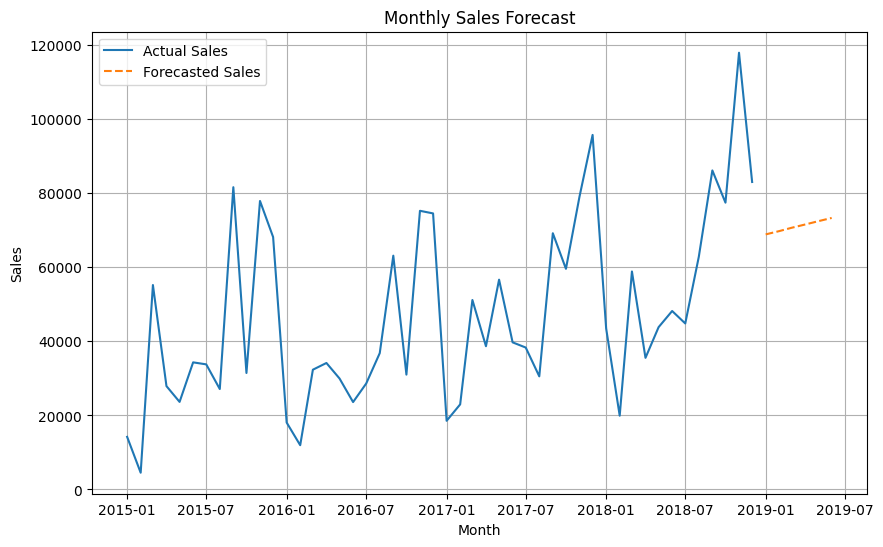

2019-01: $68879.00
2019-02: $69767.31
2019-03: $70655.62
2019-04: $71543.93
2019-05: $72432.25
2019-06: $73320.56


In [2]:
df = pd.read_csv("train.csv")  # Replace with your actual file

# 2. Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# 3. Create a 'Year-Month' column and aggregate sales
df['YearMonth'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

# 4. Prepare data for modeling
monthly_sales['MonthNumber'] = np.arange(len(monthly_sales)) + 1  # e.g., Month 1, 2, ...
X = monthly_sales[['MonthNumber']]
y = monthly_sales['Sales']

# 5. Train linear regression model
model = LinearRegression()
model.fit(X, y)

# 6. Predict next 6 months
future_months = np.arange(len(monthly_sales)+1, len(monthly_sales)+7).reshape(-1, 1)
future_preds = model.predict(future_months)

# 7. Plot the actuals and predictions
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['YearMonth'], y, label='Actual Sales')
plt.plot(pd.date_range(monthly_sales['YearMonth'].iloc[-1] + pd.offsets.MonthBegin(1),
                       periods=6, freq='MS'), future_preds, label='Forecasted Sales', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Forecast')
plt.legend()
plt.grid(True)
plt.show()

# 8. Print forecasted values
forecast_dates = pd.date_range(monthly_sales['YearMonth'].iloc[-1] + pd.offsets.MonthBegin(1), periods=6, freq='MS')
for date, pred in zip(forecast_dates, future_preds):
    print(f"{date.strftime('%Y-%m')}: ${pred:.2f}")


# **Yearly Sales**

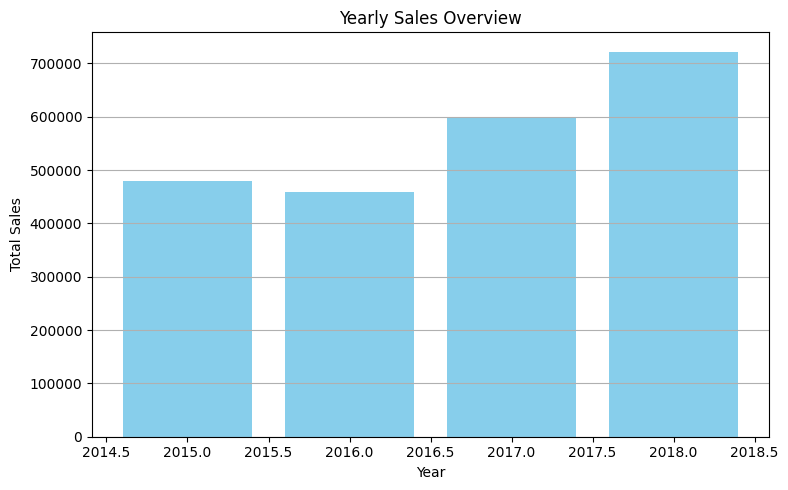

In [4]:
# Create Year column
df['Year'] = df['Order Date'].dt.year
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

# Bar plot for yearly sales
plt.figure(figsize=(8, 5))
plt.bar(yearly_sales['Year'], yearly_sales['Sales'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales Overview')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


# **Regression Line Fit**

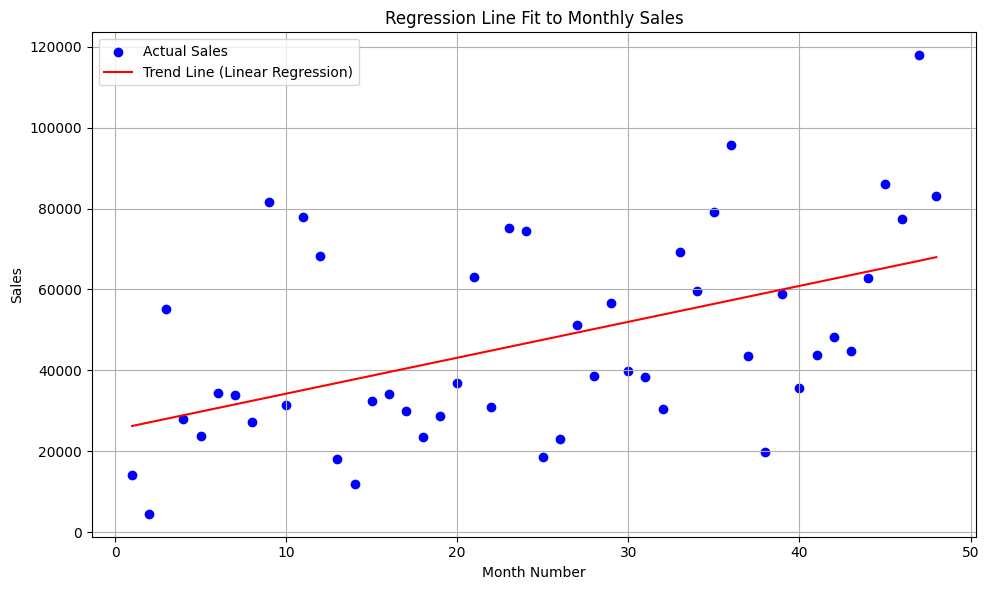

In [5]:
# Plot actual monthly sales and regression line
plt.figure(figsize=(10, 6))
plt.scatter(monthly_sales['MonthNumber'], y, label='Actual Sales', color='blue')
plt.plot(monthly_sales['MonthNumber'], model.predict(X), label='Trend Line (Linear Regression)', color='red')
plt.xlabel('Month Number')
plt.ylabel('Sales')
plt.title('Regression Line Fit to Monthly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
